array([7.22031159])

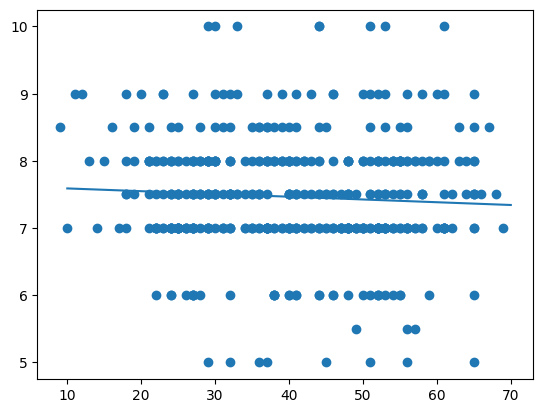

In [48]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np
import scipy 
import scipy.stats
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind

df = pd.read_csv("../datasets/Sleep_Efficiency.csv") 

age, sleep = df["Age"], df["Sleep duration"]
age, sleep = age.to_numpy(), sleep.to_numpy()
model = LinearRegression(fit_intercept=True)
model.fit(age.reshape(-1, 1), sleep)

xfit = np.linspace(10, 70, 100)
yfit = model.predict(xfit.reshape(-1, 1))

plt.scatter(age, sleep)
plt.plot(xfit, yfit);
model.predict([[100]])



In [49]:
def compute_cost(x, y, w, b): 
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    total_cost = 0
    
    #  ваш код
    y_pred = w @ x.T + b
    total_cost = (1/(len(x))) * np.sum((y-y_pred)**2)
    
    return total_cost

In [60]:


data = pd.read_csv("../datasets/Sleep_Efficiency.csv")
data = data.sample(frac=1)
l = len(data)
test = data.iloc[:round(0.2*l)]
train = data.iloc[round(0.2*l):]
x, y = train[["REM sleep percentage", "Deep sleep percentage", "Light sleep percentage"]], train["Sleep efficiency"]
x_test, y_test = test[["REM sleep percentage", "Deep sleep percentage", "Light sleep percentage"]], test["Sleep efficiency"]
model = LinearRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_)
print(compute_cost(x, y, model.coef_, model.intercept_))
print(compute_cost(x_test, y_test, model.coef_, model.intercept_))

0.7441459633160189
[ 0.00367326  0.00177767 -0.00545094]
0.005960346621726167
0.005972456753349667


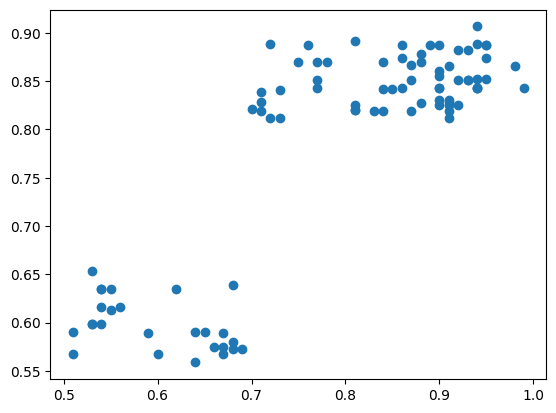

In [61]:
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)